In [6]:
# data loading

from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('dataset/train/', class_mode='categorical', target_size=(32,32))
test_it = datagen.flow_from_directory('dataset/test/', class_mode='categorical', target_size=(32,32))
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.
Batch shape=(32, 32, 32, 3), min=0.000, max=255.000


In [7]:

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model-
base_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False ## Not trainable weights


In [8]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(6, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [9]:

from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


history = model.fit(train_it, epochs=10, validation_data=test_it, verbose = 1)

Epoch 1/10
341/341 [==============================] - 211s 618ms/step - loss: 1.6485 - accuracy: 0.3280 - val_loss: 1.4795 - val_accuracy: 0.3673
Epoch 2/10
341/341 [==============================] - 189s 555ms/step - loss: 1.3360 - accuracy: 0.4445 - val_loss: 1.2684 - val_accuracy: 0.4744
Epoch 3/10
341/341 [==============================] - 134s 394ms/step - loss: 1.1479 - accuracy: 0.5466 - val_loss: 1.0812 - val_accuracy: 0.5956
Epoch 4/10
341/341 [==============================] - 109s 318ms/step - loss: 1.0266 - accuracy: 0.5971 - val_loss: 1.0260 - val_accuracy: 0.5993
Epoch 5/10
341/341 [==============================] - 68s 199ms/step - loss: 0.9727 - accuracy: 0.6126 - val_loss: 0.9835 - val_accuracy: 0.6268
Epoch 6/10
341/341 [==============================] - 68s 199ms/step - loss: 0.9442 - accuracy: 0.6248 - val_loss: 0.9351 - val_accuracy: 0.6401
Epoch 7/10
341/341 [==============================] - 68s 200ms/step - loss: 0.9175 - accuracy: 0.6331 - val_loss: 0.9050 - va

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                25650     
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 6)                 126       
                                                                 
Total params: 14,741,484
Trainable params: 26,796
Non-trainable params: 14,714,688
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


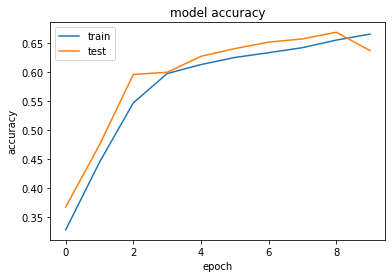

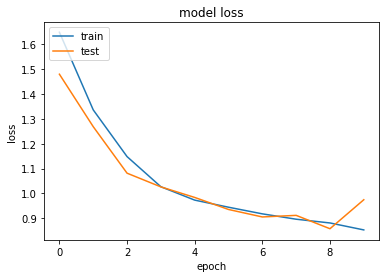

In [11]:
import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_it, test_it.samples // test_it.batch_size + 1, verbose = 1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cf = confusion_matrix(test_it.classes, y_pred)
print(confusion_matrix(test_it.classes, y_pred))
print('Classification Report')
target_names = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
print(classification_report(test_it.classes, y_pred, target_names=target_names))

85/85 [==============================] - 11s 125ms/step
Confusion Matrix
[[ 57  26  47 116 107  42]
 [ 61  22  31 113 105  49]
 [ 49  30  41 116 110  42]
 [ 79  50  68 183 159  62]
 [ 67  45  46 184 136  52]
 [ 57  33  42 109 118  44]]
Classification Report
               precision    recall  f1-score   support

  freshapples       0.15      0.14      0.15       395
  freshbanana       0.11      0.06      0.07       381
 freshoranges       0.15      0.11      0.12       388
 rottenapples       0.22      0.30      0.26       601
 rottenbanana       0.19      0.26      0.22       530
rottenoranges       0.15      0.11      0.13       403

     accuracy                           0.18      2698
    macro avg       0.16      0.16      0.16      2698
 weighted avg       0.17      0.18      0.17      2698



<AxesSubplot:>

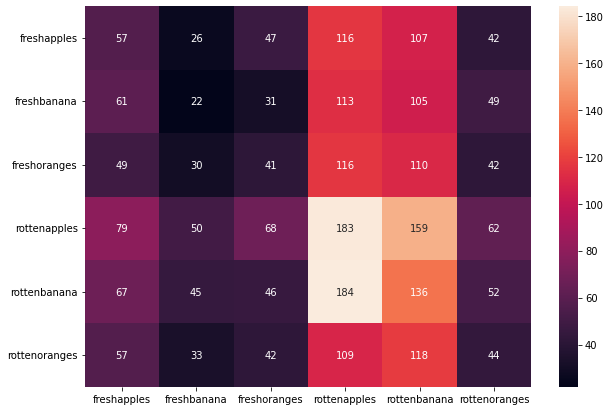

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf, index = [i for i in target_names], columns= [i for i in target_names])

plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='g')